In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Make_data(mean1, mean2, cov, N = 200, f = 0.5, cov2 = None, tag = 'p', plot = True): # 制作二维正太分布数据
    p1 = np.random.multivariate_normal(mean1, cov, size = int(N * f))
    p2 = np.random.multivariate_normal(mean2, cov if cov2 is None else cov2, size = int(N * (1 - f)))
    if plot == True:
        plt.plot(*p1.T, '.', label = tag + '0')
        plt.plot(*p2.T, '.', label = tag + '1')
        plt.legend()
    return p1, p2

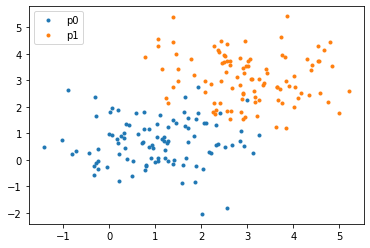

In [53]:
mean1 = np.array([1, 1], dtype = np.float64)
mean2 = np.array([3, 3], dtype = np.float64)

conv = np.diag([1, 1]) # 生成仅对角线有值的协方差矩阵

N = 200  # 数据集大小

p1, p2 = Make_data(mean1, mean2, conv, N)  # n1 * 2 and n2 * 2

In [5]:
p3 = np.append(p1, p2, axis = 0)
k = np.ones(shape = (len(p3), 1))
p = np.append(p3, k, axis = 1)

y = np.append(np.zeros(shape = (len(p1), 1)), np.ones(shape = (len(p2) , 1)), axis = 0) # 制作label

In [57]:
w = np.random.normal(0, size = (2, 1))
b = np.random.normal(0, size = (1, 1)) # 初始化 w, b
beta = np.append(w, b, axis = 0) # (2 + 1) * 1  

In [6]:
def Sigmoid(x):
    return np.exp(x) / (1.0 + np.exp(x))

In [7]:
def Plot(beta, p1 = p1, p2 = p2, tag = 'p'): #可视化 线性模型
    dr_x = np.linspace(-2, 5)
    dr_y = (-beta[0] * dr_x - beta[2]) / beta[1]

    plt.plot(*p1.T, '.', label = tag + '0')
    plt.plot(*p2.T, '.', label = tag + '1')
    plt.plot(dr_x, dr_y)
    plt.legend(loc = 4)

In [36]:
def Plot_x2(beta, p1 = p1, p2 = p2, tag = 'p'):#可视化 二次函数
    dr_x = np.linspace(-2, 5)
    dr_y = (-beta[0] * (dr_x ** 2) - beta[1] * dr_x - beta[3]) / beta[2]
    
    plt.plot(*p1.T, '.', label = tag + '0')
    plt.plot(*p2.T, '.', label = tag + '1')
    
    plt.plot(dr_x, dr_y)
    plt.legend(loc = 4)

In [10]:
def Ac(beta, p = p, y = y, N = N): #计算准确率
    cnt = 0
    for p_i, label in zip(p, y):
        p_matrix = np.matrix(p_i)
        beta_matrix = np.matrix(beta)
        if Sigmoid(p_matrix @ beta_matrix) >= 0.5:
            rep = 1
        else:
            rep = 0
        if rep == int(label):
            cnt += 1
    return cnt / N

0.915

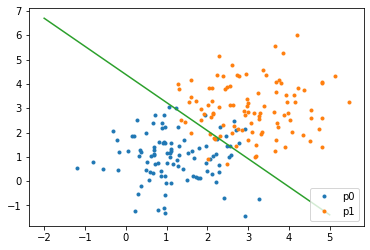

In [11]:
def Grad_decent(p, y = y, epoch = 30000, lr = 0.03): # 不加正则项的梯度下降
    W = np.matrix(beta)
    P = np.matrix(p)
    for e in range(epoch):
        W -= lr * P.T @ (Sigmoid(P @ W) - y) / N
    return np.asarray(W)
    
beta1 = Grad_decent(p)
Plot(beta1)
Ac(beta1)

0.925

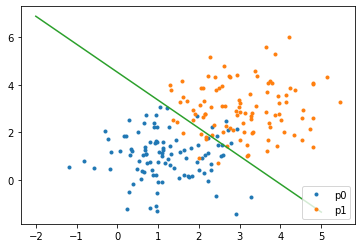

In [58]:
def Grad_decent_nbd(p, y = y, nbd = 0.0001, epoch = 30000, lr = 0.03): #加入正则项的梯度下降， nbd为正则项前系数
    W = np.matrix(beta)
    P = np.matrix(p)
    for e in range(epoch):
        W -= lr * (P.T @ (Sigmoid(P @ W) - y) / N + nbd * W.T @ W)
    return np.asarray(W)

beta2 = Grad_decent_nbd(p)
Plot(beta2)
Ac(beta2)

In [65]:
w_2 = np.random.normal(0, size = (3, 1)) # 二次函数模型参数初始化
b_2 = np.random.normal(0, size = (1, 1))
beta_2 = np.append(w_2, b_2, axis = 0)

x_2 = np.power(p[:, 0], 2) # x^2
x_2 = x_2[:, None]
p_2 = np.append(x_2, p, axis = 1) # 制作[x^2  x  y]格式的数据集

0.92

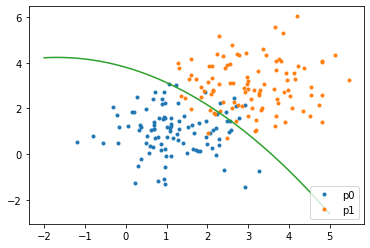

In [70]:
def Grad_decent_x2(p, y = y, epoch = 30000, lr = 0.03): #不带正则项的梯度下降，写的较为冗余（不想改传参了就直接粘下来把beta换成beta2了）
    W = np.matrix(beta_2)
    P = np.matrix(p)
    for e in range(epoch):
        W -= lr * P.T @ (Sigmoid(P @ W) - y) / N
    return np.asarray(W)
    
beta_x2 = Grad_decent_x2(p_2)
Plot_x2(beta_x2)
Ac(beta_x2, p_2)

0.92

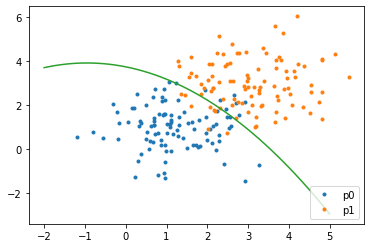

In [71]:
def Grad_decent_nbd_x2(p, y = y, nbd = 0.0001, epoch = 30000, lr = 0.03): #带正则项的梯度下降
    W = np.matrix(beta_2)
    P = np.matrix(p)
    for e in range(epoch):
        W -= lr * (P.T @ (Sigmoid(P @ W) - y) / N + nbd * W.T @ W)
    return np.asarray(W)
    
beta_x2 = Grad_decent_nbd_x2(p_2)
Plot_x2(beta_x2)
Ac(beta_x2, p_2)

accuracy: 0.95


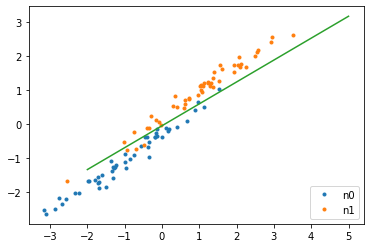

In [231]:
def Test_No_Bayes(): # x,y 不再独立
    dot_num = 100
    # cov = np.array([[1.3, 1], [1, 0.8]]) 协方差矩阵
    n1, n2 = Make_data(np.array([-1, -1]), np.array([1, 1]), np.array([[1.3, 1], [1, 0.8]]), N = dot_num, tag = 'n', plot = False) 
    
    n3 = np.append(n1, n2, axis = 0)
    n = np.append(n3, np.ones(shape = (len(n3), 1)), axis = 1)
    
    y_n = np.append(np.zeros(shape = (len(n1), 1)), np.ones(shape = (len(n2), 1)), axis = 0)
    
    beta3 = Grad_decent(n, y = y_n)
    Plot(beta3, n1, n2, tag = 'n')
    print("accuracy:", Ac(beta3, p = n, y = y_n, N = dot_num))

Test_No_Bayes()